## A First Julia Program

#### John Stachurski
#### Prepared for the RBA / RBNZ Julia Workshops, March 2017

Let's run an example that plots some time series.

First we need to import a plotting library.

In [9]:
using PyPlot

Now here's our code.  It plots the time series

$$ X_{t+1} = \alpha X_t + W_{t+1} $$

where 

* $\{W_t\}$ is standard normal,
* $X_0 = 0$

and $\alpha$ takes three different values

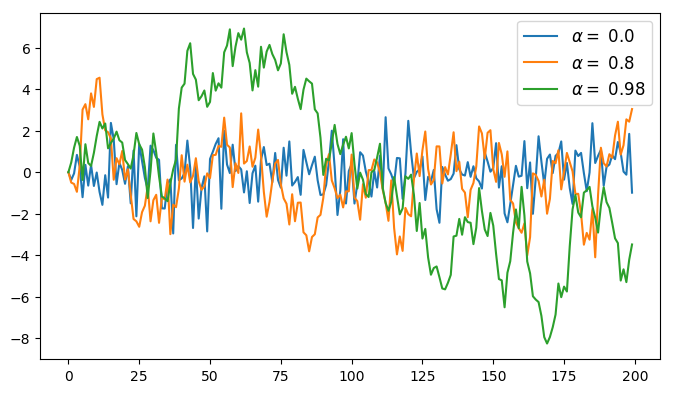

PyObject <matplotlib.legend.Legend object at 0x7f7a986ca710>

In [10]:
alphas = [0.0, 0.8, 0.98]
ts_length = 200

fig, ax = subplots(figsize=(8, 4.5))

for α in alphas
    X = zeros(ts_length)
    for t in 1:(ts_length - 1)
        X[t+1] = α * X[t] + randn()
    end
    label_string = L"α = " * " $α"
    ax[:plot](X, label=label_string)
end

ax[:legend](fontsize=12)

## Exercises

Now let's do some exercises.  Solutions are below.  In completing the exercises, you might find these links useful:

* [Julia cheatsheet](https://cheatsheets.quantecon.org/julia-cheatsheet.html)
* [Julia-Matlab comparison](https://cheatsheets.quantecon.org/index.html)
* [Julia essentials](https://lectures.quantecon.org/jl/julia_essentials.html)
* [Vectors, arrays and matrices](https://lectures.quantecon.org/jl/julia_arrays.html)

#### Exercise 1

Generate a single time series following an AR(1) process as above when $\alpha = 0.99$.  However, let's now add reflecting barriers at $-2$ and $2$.  Thus, 

$$ y_{t+1} =  \alpha X_t + W_{t+1} $$

and 

$$ X_{t+1} = 
\begin{cases}
    -2 & \text{ if } y_{t+1} < -2 \\
    2 & \text{ if } y_{t+1} > 2 \\
    y_{t+1} & \text{ otherwise}
    \end{cases}
$$

Plot the time series.

In [4]:
for i in 1:40
    println("solution below!")
end

solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!


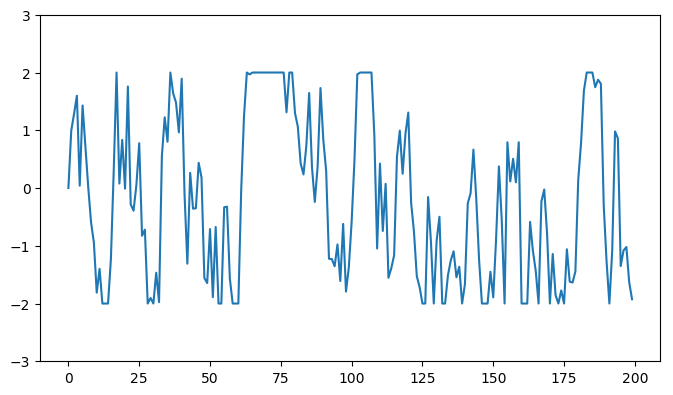

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7aa01d20f0>

In [5]:
alpha = 0.99
X = zeros(ts_length)

fig, ax = subplots(figsize=(8, 4.5))
ax[:set_ylim](-3, 3)

for t in 1:(ts_length-1)
    y = alpha * X[t] + randn()
    if y > 2
        X[t+1] = 2
    elseif y < -2
        X[t+1] = -2
    else
        X[t+1] = y
    end
end
        

plot(X, label="AR1 with reflecting barriers")

#### Exercise 2

Assuming that the spectral radius of the $n \times n$ matrix $\Pi$ is strictly less
than one, the equation

$$ x = \Pi x + b $$

has a unique $n \times 1$ solution vector $x$ for each choice of the vector $b$.  The
solution satisfies

$$
  x^* = (I - \Pi)^{-1} b = \sum_{t=0}^\infty \Pi^t b
$$

where $I$ is the identity matrix.  Try computing this solution using both of these expressions, for the matrix

$$
\Pi = 
\begin{pmatrix}
    0.4 & 0.2 \\
    0.6 & 0.2
\end{pmatrix}
$$

and vector $b = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$.  In the second case you will have
to truncate the infinite sum at some reasonable level.

In [6]:
for i in 1:40
    println("solution below")
end

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below


First let's do this with matrix algebra.

In [7]:
Π = [0.4 0.2;
     0.6 0.2]

b = ones(2, 1)

x_star = (eye(2) - Π) \ b
print(x_star)

[2.77778; 3.33333]

Now let's compute the solution using the truncated sum.

In [8]:
E = eye(2)
x_star = zeros(2, 1)

for i in 1:100
    x_star += E * b
    E = E * Π
end
print(x_star)

[2.77778; 3.33333]